## 1.题目：
从给定的房屋基本信息以及房屋销售信息等，建立一个回归模型预测房屋的销售价格。

**数据说明**：
数据主要包括2014年5月至2015年5月美国 King County 的房屋销售价格以及房屋的基本信息。
数据分为训练数据和测试数据，分别保存在 kc_train.txt 和 kc_test.txt 两个文件中。
其中训练数据主要包括10000条记录，14个字段，主要字段说明如下：
* 第一列“销售日期”：2014年5月到2015年5月房屋出售时的日期
* 第二列“销售价格”：房屋交易价格，单位为美元，是目标预测值
* 第三列“卧室数”：房屋中的卧室数目
* 第四列“浴室数”：房屋中的浴室数目
* 第五列“房屋面积”：房屋里的生活面积
* 第六列“停车面积”：停车坪的面积
* 第七列“楼层数”：房屋的楼层数
* 第八列“房屋评分”：King County 房屋评分系统对房屋的总体评分
* 第九列“建筑面积”：除了地下室之外的房屋建筑面积
* 第十列“地下室面积”：地下室的面积
* 第十一列“建筑年份”：房屋建成的年份
* 第十二列“修复年份”：房屋上次修复的年份
* 第十三列"纬度"：房屋所在纬度
* 第十四列“经度”：房屋所在经度

测试数据主要包括3000条记录，13个字段，跟训练数据的不同是测试数据并不包括房屋销售价格，学员需要通过由训练数据所建立的模型以及所给的测试数据，得出测试数据相应的房屋销售价格预测值。

## 2.步骤
![](https://github.com/yunjcai/ML-DL-Training-Materials/blob/main/01%20Linear%20Regression/image/3.jpg?raw=true)

- 1.选择合适的模型，对模型的好坏进行评估和选择。
- 2.对缺失的值进行补齐操作，可以使用均值的方式补齐数据，使得准确度更高。
- 3.数据的取值一般跟属性有关系，但世界万物的属性是很多的，有些值小，但不代表不重要，所有为了提高预测的准确度，统一数据维度进行计算，方法有特征缩放和归一法等。
- 4.数据处理好之后就可以进行调用模型库进行训练了。
- 5.使用测试数据进行目标函数预测输出，观察结果是否符合预期。或者通过画出对比函数进行结果线条对比。

## 3.模型选择
这里我们选择多元线性回归模型。公式如下：选择多元线性回归模型。
![](https://github.com/yunjcai/ML-DL-Training-Materials/blob/main/01%20Linear%20Regression/image/4.jpg?raw=true)

$y$ 表示我们要求的销售价格，$x$ 表示特征值。需要调用 sklearn 库来进行训练。

## 4.环境配置

- python3.7
- numpy
- pandas
- matplotlib
- seaborn
- sklearn

## 5.csv数据处理

下载的是两个数据文件，一个是真实数据，一个是测试数据，打开 *kc_train.txt*，能够看到第二列是销售价格，而我们要预测的就是销售价格，所以在训练过程中是不需要销售价格的，把第二列删除掉，新建一个 txt 文件存放销售价格这一列，作为后面的结果对比。

In [1]:
import pandas as pd

# 读取数据
housing = pd.read_csv('kc_train.txt',header=None)
target = housing.pop(housing.columns[1]) # 第二列是销售价格，是我们要预测的

# 新建一个 txt 文件存放销售价格这一列
target.to_csv('kc_train2.txt',header=None,index=False)
housing.head()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  


,0,2,3,4,5,6,7,8,9,10,11,12,13
0,20150302,3,2.25,1670,6240,1.0,8,1240,430,1974,0,47.6413,-122.113
1,20150211,4,2.50,3300,10514,2.0,10,3300,0,1984,0,47.6323,-122.036
2,20150107,3,3.25,3190,5283,2.0,9,3190,0,2007,0,47.5534,-122.002
3,20141103,5,2.50,2900,9525,2.0,9,2900,0,1989,0,47.5442,-122.138
4,20140603,5,2.75,2040,7488,1.0,7,1200,840,1969,0,47.7289,-122.172


## 6.数据处理

首先先读取数据，查看数据是否存在缺失值，然后进行特征缩放统一数据维度。

In [2]:
# 数据预处理
# 查看是否有缺失值
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
0     10000 non-null int64
2     10000 non-null int64
3     10000 non-null float64
4     10000 non-null int64
5     10000 non-null int64
6     10000 non-null float64
7     10000 non-null int64
8     10000 non-null int64
9     10000 non-null int64
10    10000 non-null int64
11    10000 non-null int64
12    10000 non-null float64
13    10000 non-null float64
dtypes: float64(4), int64(9)
memory usage: 1015.8 KB


In [3]:
# 特征缩放
from sklearn.preprocessing import MinMaxScaler

# 进行内部拟合，内部参数会发生变化
scaler = MinMaxScaler()

scaler_housing = scaler.fit_transform(housing)
scaler_housing = pd.DataFrame(scaler_housing, columns=housing.columns)

scaler_housing.head()

,0,2,3,4,5,6,7,8,9,10,11,12,13
0,0.977556,0.3,0.290323,0.134737,0.003434,0.0,0.5,0.100354,0.089212,0.643478,0.0,0.779557,0.337209
1,0.968479,0.4,0.322581,0.306316,0.006023,0.4,0.7,0.343566,0.000000,0.730435,0.0,0.765001,0.401163
2,0.958105,0.3,0.419355,0.294737,0.002854,0.4,0.6,0.330579,0.000000,0.930435,0.0,0.637393,0.429402
3,0.059950,0.5,0.322581,0.264211,0.005423,0.4,0.6,0.296340,0.000000,0.773913,0.0,0.622513,0.316445
4,0.010075,0.5,0.354839,0.173684,0.004190,0.0,0.4,0.095632,0.174274,0.600000,0.0,0.921236,0.288206


## 7.模型训练

使用 sklearn 库的线性回归函数进行调用训练。梯度下降法获得误差最小值。最后使用均方误差法来评价模型的好坏程度，并画图进行比较。

In [4]:
# 选择基于梯度下降的线性回归模型
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# 进行拟合
lr.fit(scaler_housing,target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [5]:
# 使用均方误差用于评价模型好坏
from sklearn.metrics import mean_squared_error

# 输入数据进行预测得到结果
pred = lr.predict(scaler_housing)
# 使用均方误差来评价模型好坏，可以输出mse进行查看评价值
mse = mean_squared_error(pred,target)

mse

48739065340.672

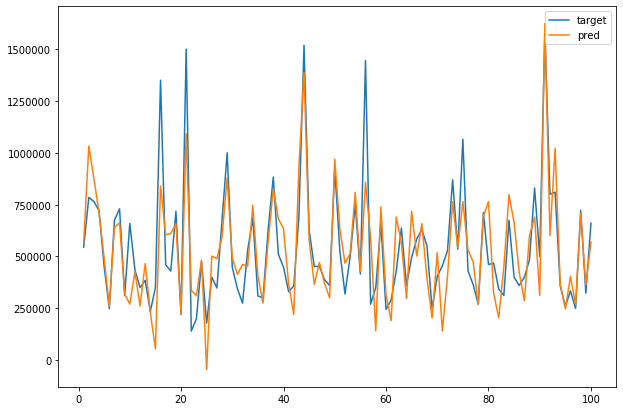

In [9]:
# 绘图进行比较
import matplotlib.pyplot as plt
import numpy as np

# 画布大小
plt.figure(figsize=(10,7))

# 取100个点进行比较
num=100
x=np.arange(1,num+1)

# 目标取值
plt.plot(x,target[:num],label='target')

# 预测取值
plt.plot(x,pred[:num],label='pred')

#线条显示位置
plt.legend(loc='upper right')
plt.show()

从这张结果对比图中就可以看出模型是否得到精确的目标函数，是否能够精确预测房价。

如果想要预测 test 文件里的数据，那就把 test 文件里的数据进行读取，并且进行特征缩放，调用：
* **lr.predict(test)**

就可以得到预测结果，并进行输出操作。